<a href="https://colab.research.google.com/github/huyhoang17/Colab_Temporary/blob/master/Visual_CNN_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# https://github.com/gabrielpierobon/cnnshapes

In [2]:
%matplotlib inline

import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=[28, 28, 1]))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 32)          18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              528384    
__________

In [0]:
model.compile(
    loss='categorical_crossentropy', optimizer='adadelta',
    metrics=['accuracy']
)

In [0]:
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)

In [0]:
def train_data_generator():
    (X_train, y_train), (_, _) = mnist.load_data()
    y_train = np_utils.to_categorical(y_train, 10)
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    X_train = X_train.astype('float32')
    X_train /= 255
    while True:
        for i in range(1875):  # 1875 * 32 = 60000 -> # of training samples
            # (32, 1, 28, 28), (32, 10)
            yield X_train[i * 32:(i + 1) * 32], y_train[i * 32:(i + 1) * 32]

In [0]:
def test_data_generator():
    (_, _), (X_test, y_test) = mnist.load_data()
    y_test = np_utils.to_categorical(y_test, 10)
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
    X_test = X_test.astype('float32')
    X_test /= 255
    while True:
        for i in range(312):
            yield X_test[i * 32:(i + 1) * 32], y_test[i * 32:(i + 1) * 32]

In [0]:
train_gen = train_data_generator()
test_gen = test_data_generator()

In [14]:
history = model.fit_generator(
    train_gen, steps_per_epoch=60000 // 32, nb_epoch=10,
    validation_data=test_gen, validation_steps=10000//32,
    callbacks=[checkpointer]
)

Epoch 1/10
  15/1875 [..............................] - ETA: 23s - loss: 0.0072 - acc: 0.9958

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=1875, validation_data=<generator..., validation_steps=312, callbacks=[<keras.ca..., epochs=10)`
  after removing the cwd from sys.path.


1875/1875 [==============================] - 26s 14ms/step - loss: 0.0077 - acc: 0.9977 - val_loss: 0.0376 - val_acc: 0.9919

Epoch 00001: val_acc did not improve from 0.99249
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0063 - acc: 0.9980 - val_loss: 0.0410 - val_acc: 0.9903

Epoch 00002: val_acc did not improve from 0.99249
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0050 - acc: 0.9986 - val_loss: 0.0429 - val_acc: 0.9919

Epoch 00003: val_acc did not improve from 0.99249
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0054 - acc: 0.9984 - val_loss: 0.0426 - val_acc: 0.9922

Epoch 00004: val_acc did not improve from 0.99249
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0050 - acc: 0.9984 - val_loss: 0.0402 - val_acc: 0.9934

Epoch 00005: val_acc improved from 0.99249 to 0.99339, saving model to best_weights.hdf5
Epoch 6/10
1875/1875 [===============

In [0]:
model.save_weights('best_weight.h5')
json_string = model.to_json()

with open('config.json', 'w') as f:
    f.write(json_string)

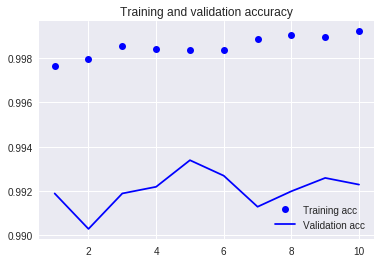

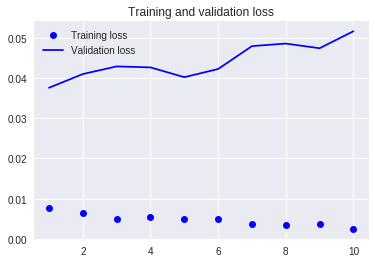

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
(_, _), (X_test, y_test) = mnist.load_data()
y_test = np_utils.to_categorical(y_test, 10)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_test = X_test.astype('float32')
X_test /= 255

In [19]:
X_test[0].shape

(28, 28, 1)

In [0]:
x_test = X_test[:9]

In [34]:
x_test.shape

(9, 28, 28, 1)

In [0]:
classes = model.predict_classes(x_test)

In [36]:
classes

array([7, 2, 1, 0, 4, 1, 4, 9, 5])

In [0]:
def show_imgs(imgs):
  fig = plt.figure(figsize=(8, 8))
  columns = 3
  rows = 3
  for i in range(1, columns*rows +1):
      fig.add_subplot(rows, columns, i)
      plt.imshow(np.squeeze(imgs[i - 1]))
  plt.show()

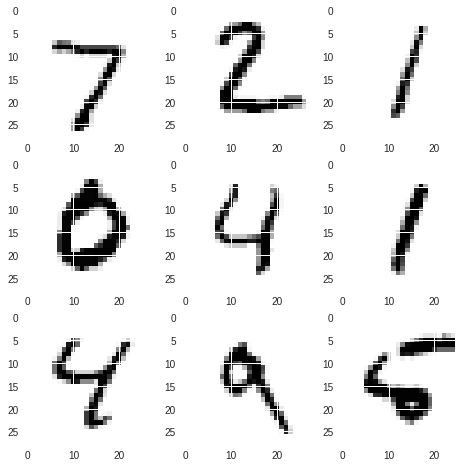

In [39]:
show_imgs(X_test[:9])

In [40]:
model.layers

In [41]:
for layer in model.layers:
  print(layer.output)

Tensor("conv2d_1/Relu:0", shape=(?, 26, 26, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 24, 24, 64), dtype=float32)
Tensor("max_pooling2d_1/MaxPool:0", shape=(?, 8, 8, 64), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 6, 6, 32), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 2, 2, 32), dtype=float32)
Tensor("flatten_1/Reshape:0", shape=(?, ?), dtype=float32)
Tensor("dense_1/Relu:0", shape=(?, 4096), dtype=float32)
Tensor("dropout_1/cond/Merge:0", shape=(?, 4096), dtype=float32)
Tensor("dense_2/Softmax:0", shape=(?, 10), dtype=float32)


In [0]:
layer_outputs = [layer.output for layer in model.layers] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [43]:
activation_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 32)          18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
__________

In [0]:
activations = activation_model.predict(X_test[:9])

In [49]:
len(activations)

9

In [50]:
activations[0].shape

(9, 26, 26, 32)

In [51]:
activations[1].shape

(9, 24, 24, 64)

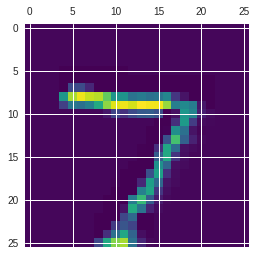

In [54]:
plt.matshow(activations[0][0, :, :, 4], cmap='viridis')

In [0]:
layer_names = []
for layer in model.layers:
    layer_names.append(layer.name)

In [56]:
layer_names

['conv2d_1',
 'conv2d_2',
 'max_pooling2d_1',
 'conv2d_3',
 'max_pooling2d_2',
 'flatten_1',
 'dense_1',
 'dropout_1',
 'dense_2']

In [0]:
images_per_row = 16

In [0]:
activations = activation_model.predict(np.expand_dims(X_test[0], axis=0))

In [0]:
def visual_cnn_layeres(layer_names, activations, index):
    for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
        n_features = layer_activation.shape[-1] # Number of features in the feature map
        size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
        n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        print(display_grid.shape, size, n_cols)
        for col in range(n_cols): # Tiles each filter into a big horizontal grid
            for row in range(images_per_row):
                channel_image = layer_activation[index,
                                                 :, :,
                                                 col * images_per_row + row]
                channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, # Displays the grid
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

(52, 416) 26 2
(96, 384) 24 4
(32, 128) 8 4
(12, 96) 6 2
(4, 32) 2 2


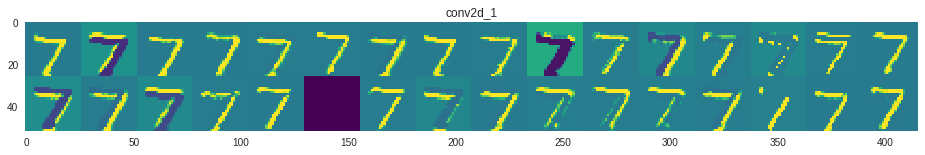

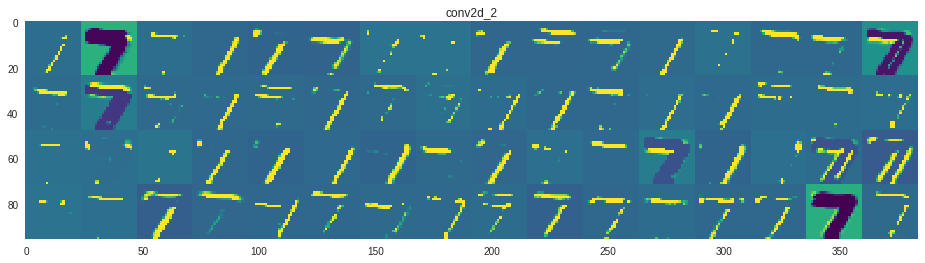

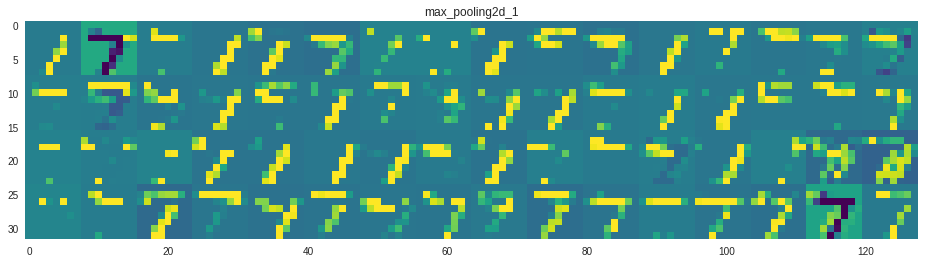

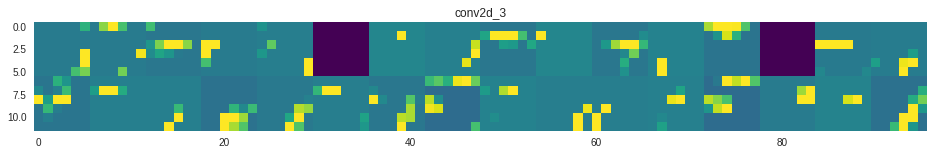

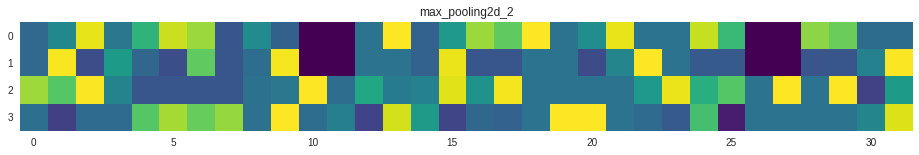

In [79]:
visual_cnn_layeres(layer_names, activations[:-4], 0)

(52, 416) 26 2
(96, 384) 24 4
(32, 128) 8 4
(12, 96) 6 2
(4, 32) 2 2
(52, 416) 26 2
(96, 384) 24 4
(32, 128) 8 4
(12, 96) 6 2
(4, 32) 2 2
(52, 416) 26 2
(96, 384) 24 4
(32, 128) 8 4
(12, 96) 6 2
(4, 32) 2 2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


(52, 416) 26 2
(96, 384) 24 4
(32, 128) 8 4
(12, 96) 6 2
(4, 32) 2 2
(52, 416) 26 2
(96, 384) 24 4
(32, 128) 

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


8 4
(12, 96) 6 2
(4, 32) 2 2
(52, 416) 26 2
(96, 384) 24 4
(32, 128) 8 4
(12, 96) 6 2
(4, 32) 2 2
(52, 416) 26 2
(96, 384) 24 4
(32, 128) 8 4
(12, 96) 6 2
(4, 32) 2 2
(52, 416) 26 2
(96, 384) 24 4
(32, 128) 8 4
(12, 96) 6 2
(4, 32) 2 2
(52, 416) 26 2
(96, 384) 24 4
(32, 128) 8 4
(12, 96) 6 2
(4, 32) 2 2


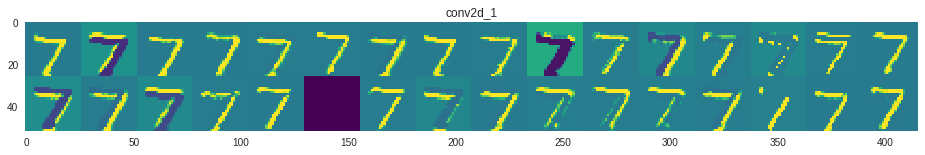

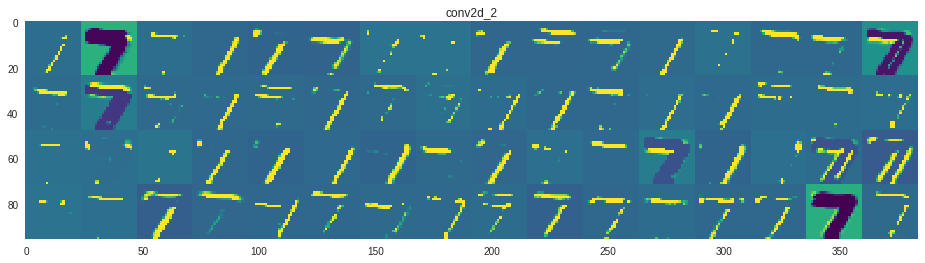

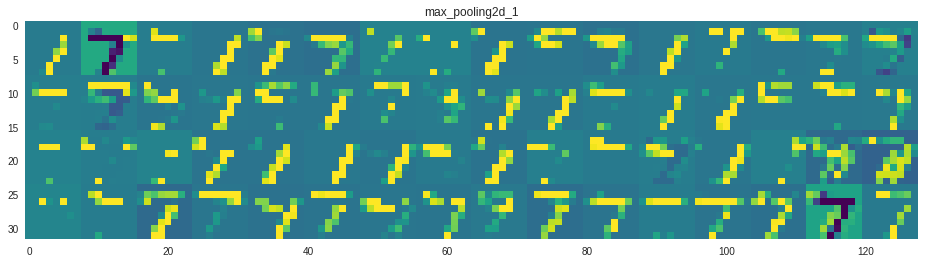

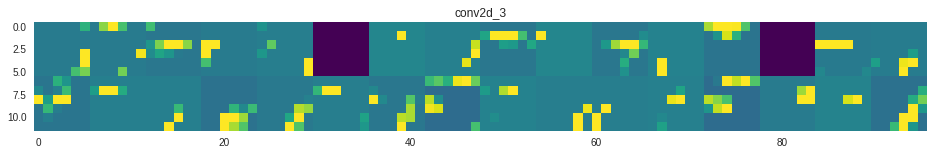

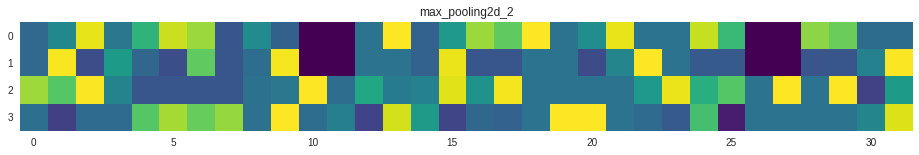

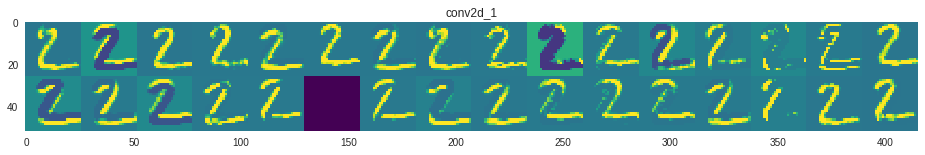

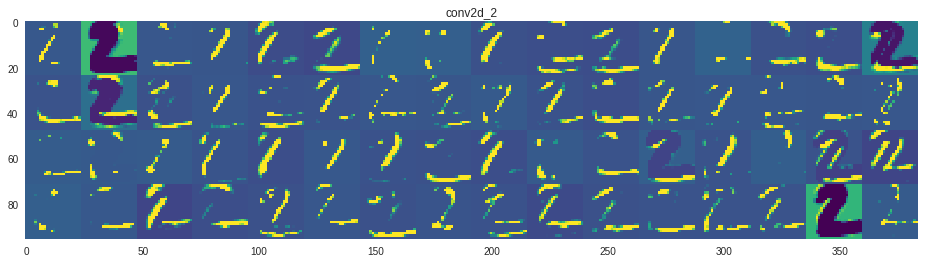

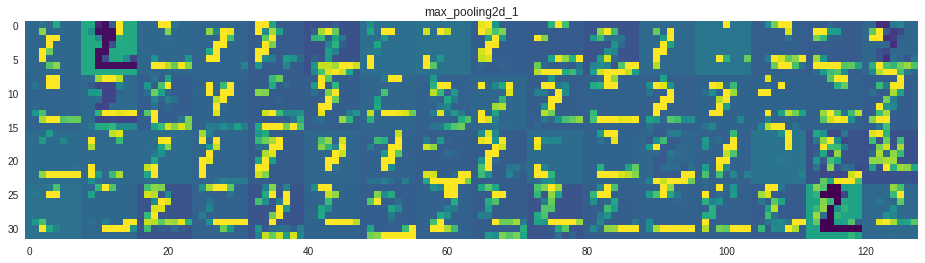

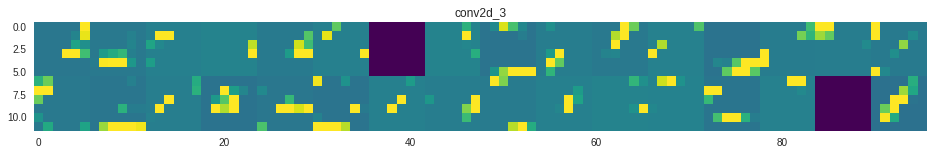

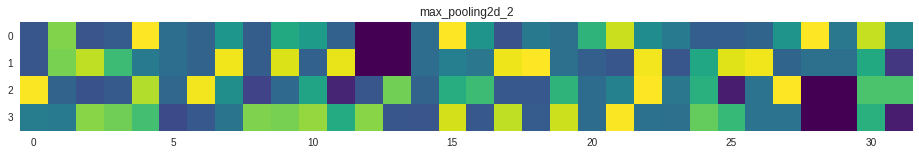

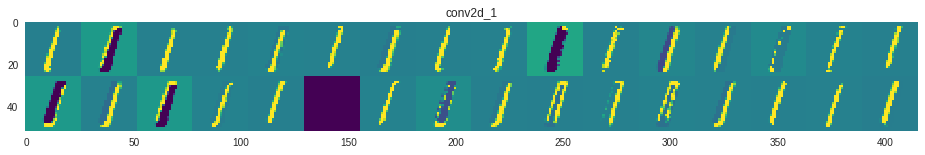

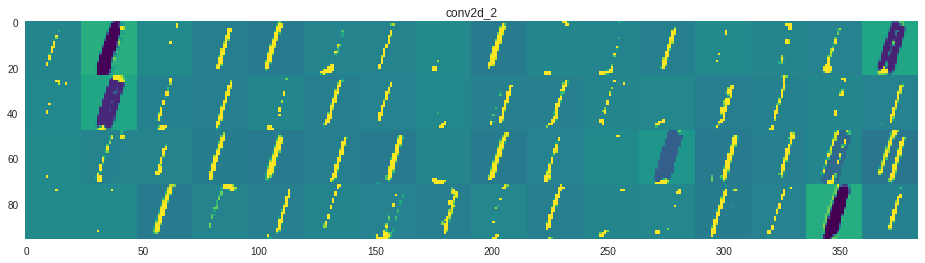

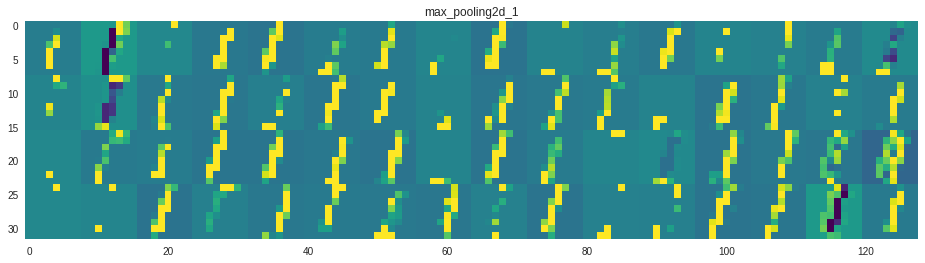

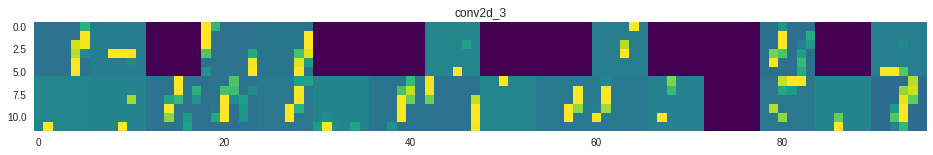

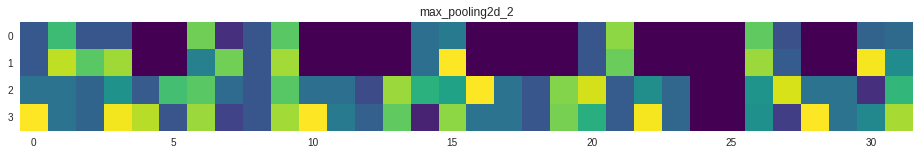

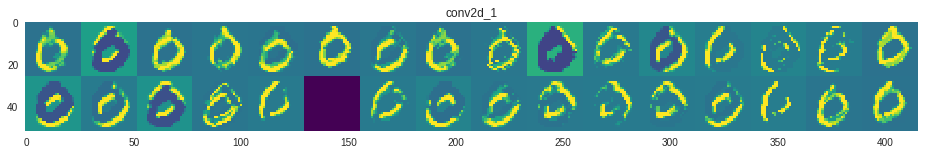

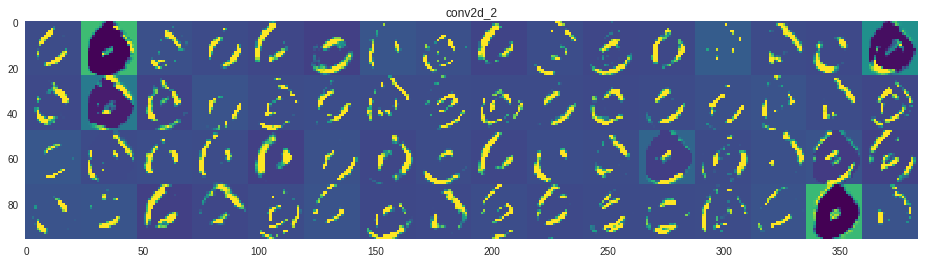

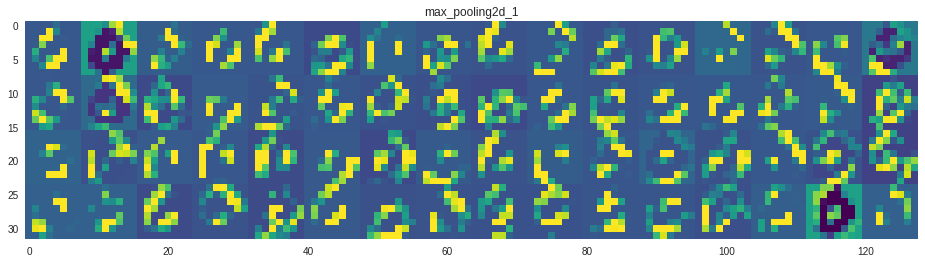

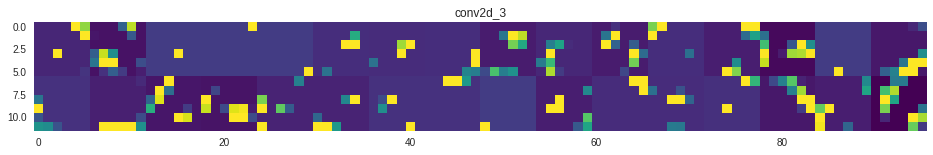

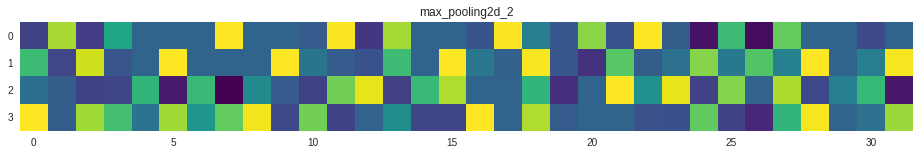

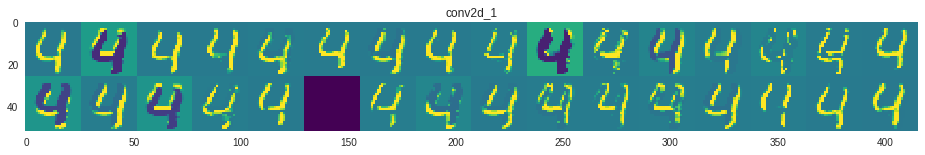

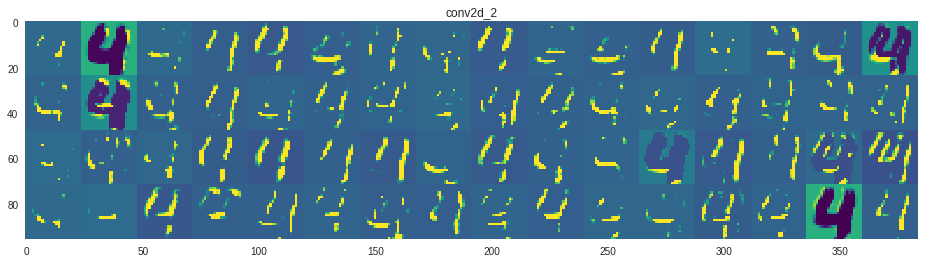

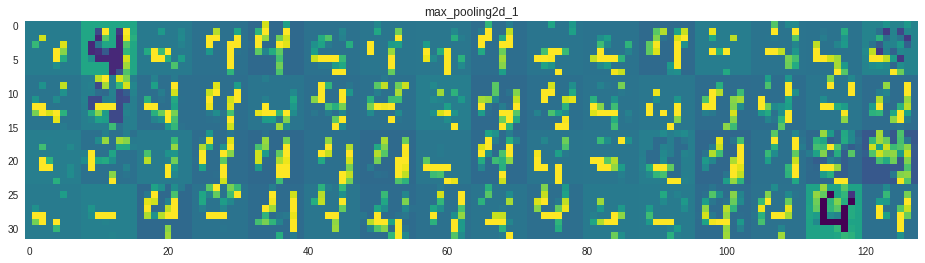

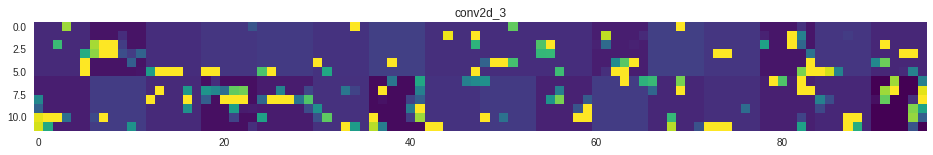

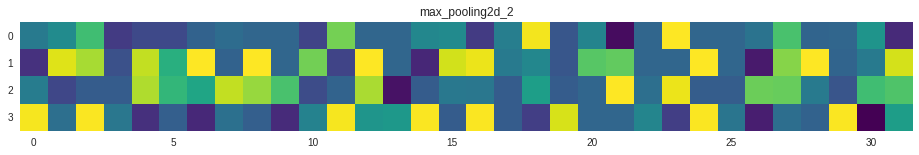

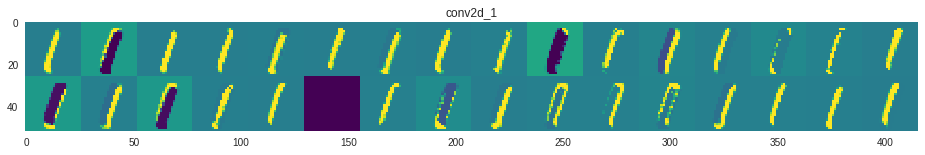

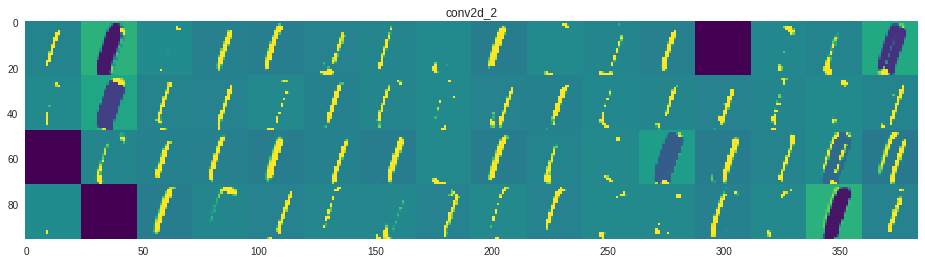

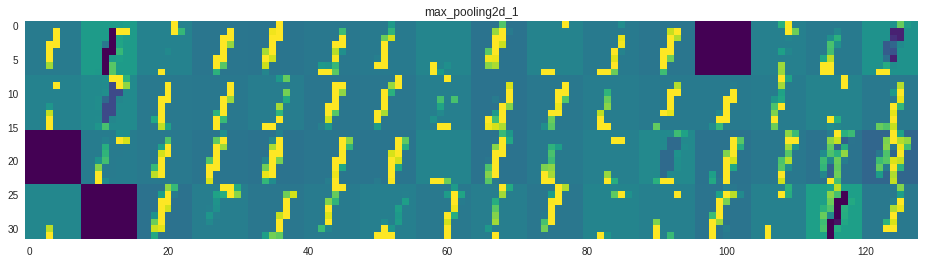

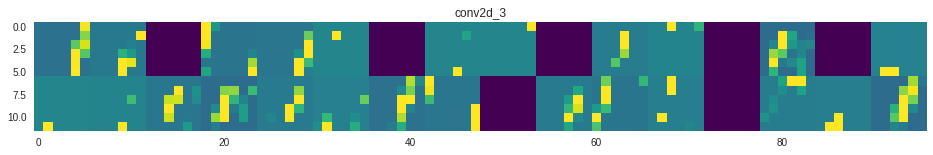

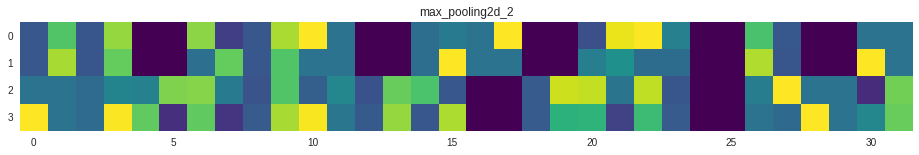

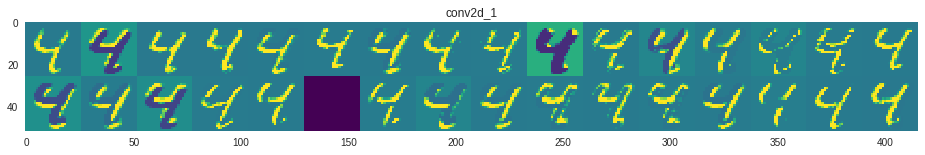

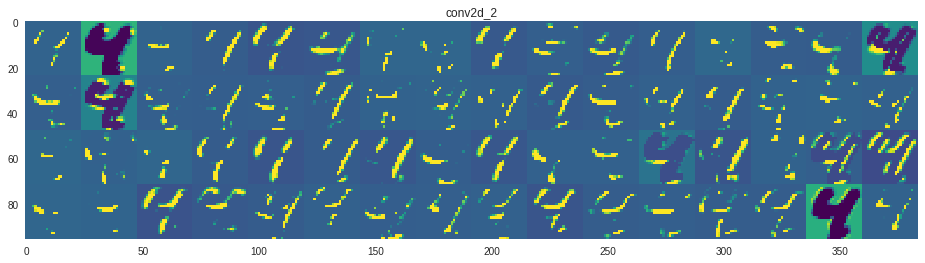

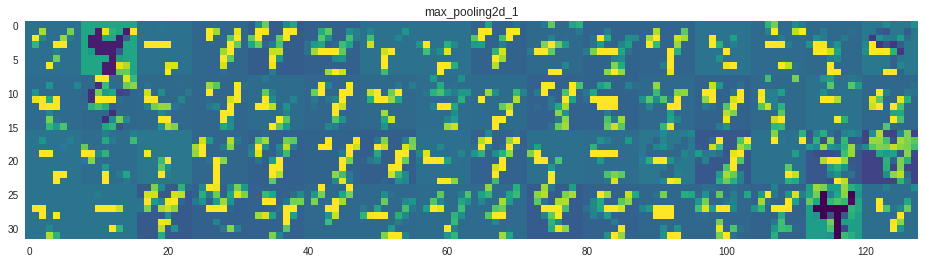

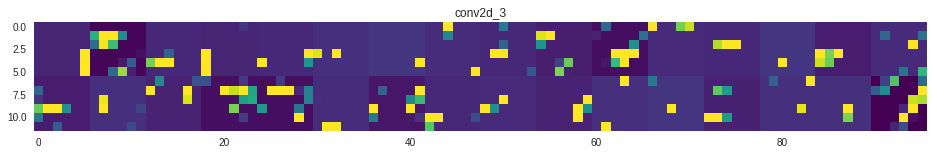

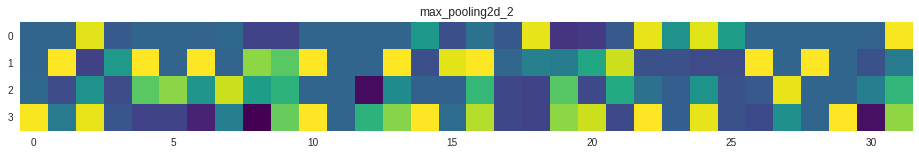

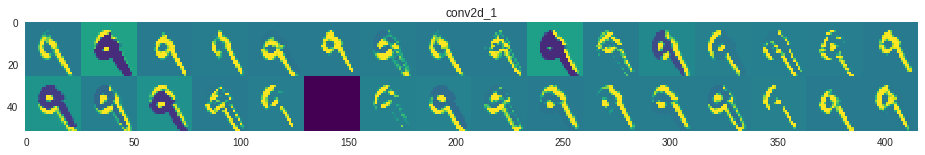

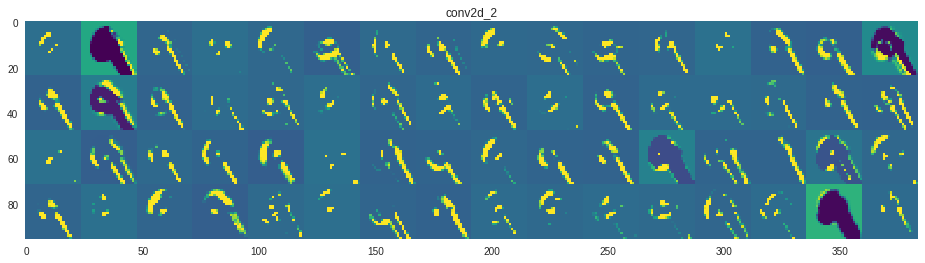

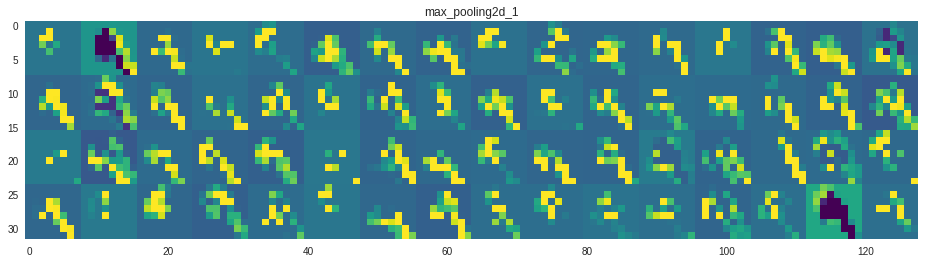

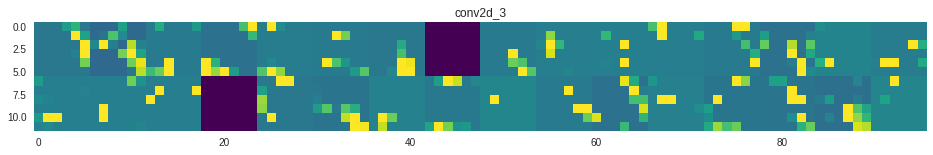

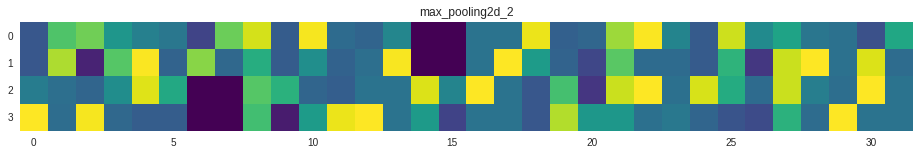

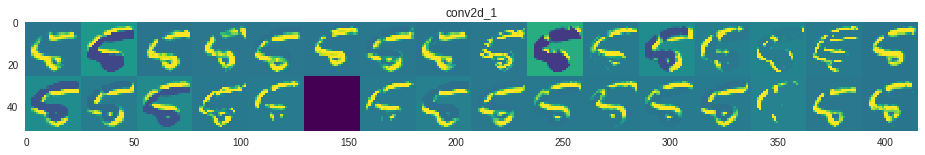

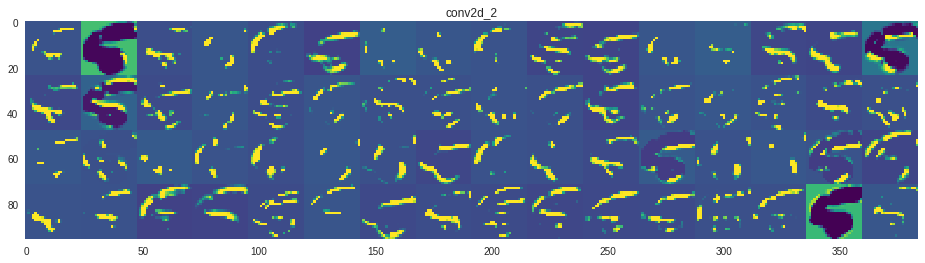

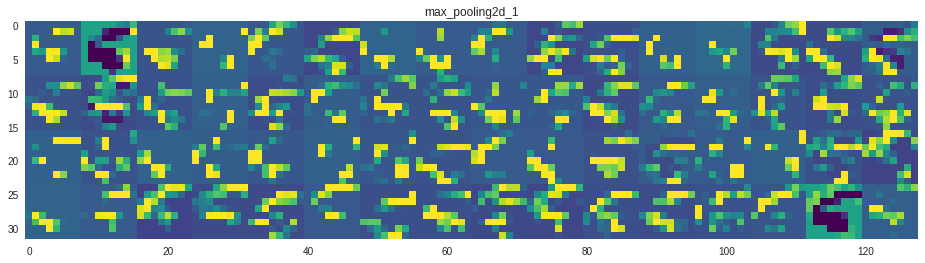

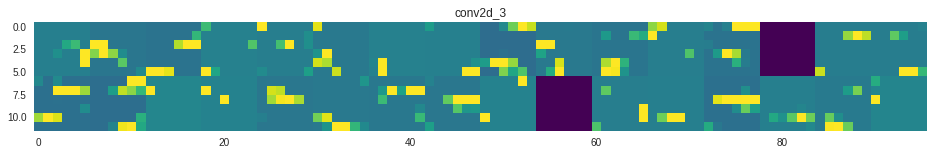

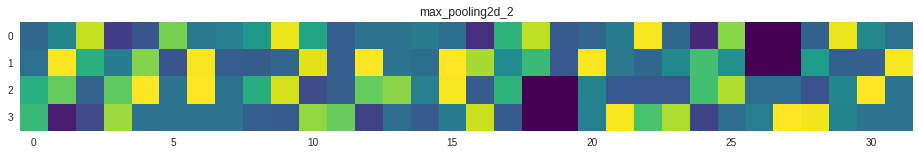

In [82]:
for i in range(9):
    visual_cnn_layeres(layer_names, activations[:-4], i)